### Author - Komal
### Batch - JUNE BATCH A55
### Domain - Data Science

# MOVIE RATING PREDICTION WITH PYTHON
---

### Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.

### The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

### Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.
  

## About Dataset : 

### Task Details
Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform. Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.


### Dataset contains :

- Name
- Year
- Duration
- Genre
- Rating
- Votes
- Director
- Actor 1
- Actor 2
- Actor 3

## Importing the necessary libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

## Reading the dataset

In [70]:
df = pd.read_csv("IMDb Movies India.csv", encoding = 'latin')
df

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.head(5)  # Read first 5 rows

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [72]:
df.tail(5)  # Read last 5 rows

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


## Shape of the dataframe

In [73]:
df.shape

(15509, 10)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Name   15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Description

In [75]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Display All Columns

In [76]:
df.columns

Index(['ï»¿Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Display all unique Years

In [77]:
df.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

### Display all Unique rating

In [78]:
df.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

## Display

In [79]:
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")


INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Name   15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                   ï»¿Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   9

## Data Cleaning

### Checking for null/missing values in the dataset

In [80]:
df.isnull().sum()

ï»¿Name        0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.shape

(5659, 10)

### Checking for duplicate values in the dataset

In [83]:
df.duplicated().sum()

0

'observations' :

- Since there is no duplicate value present.

### Cleaning the year column

In [84]:
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)

## [0-9]: Matches any single digit from 0 to 9.
##.{0,3}: Matches any character (except newline) between 0 and 3 times. 
## Combined with [0-9], this pattern matches a digit followed by up to three additional characters.

### Cleaning the duration column

In [85]:
'''
[0-9]: Matches any single digit from 0 to 9.
+: Matches one or more of the preceding element (i.e., [0-9]), meaning it will match sequences of one or more digits.

'''

df['Duration'] = df['Duration'].str.extract(r'([0-9]+)', expand=False)

### Changing the duration, year, vote column from object to numeric type

In [86]:
df['Duration']=pd.to_numeric(df['Duration'])
df['Year']=pd.to_numeric(df['Year'])
df

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [87]:
df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])
df

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [88]:
df['Duration'].dtype,df['Year'].dtype,df['Votes'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

## Exploratory Data Analysis

### Display Scatterplot

### 1. Years vs number of films rated

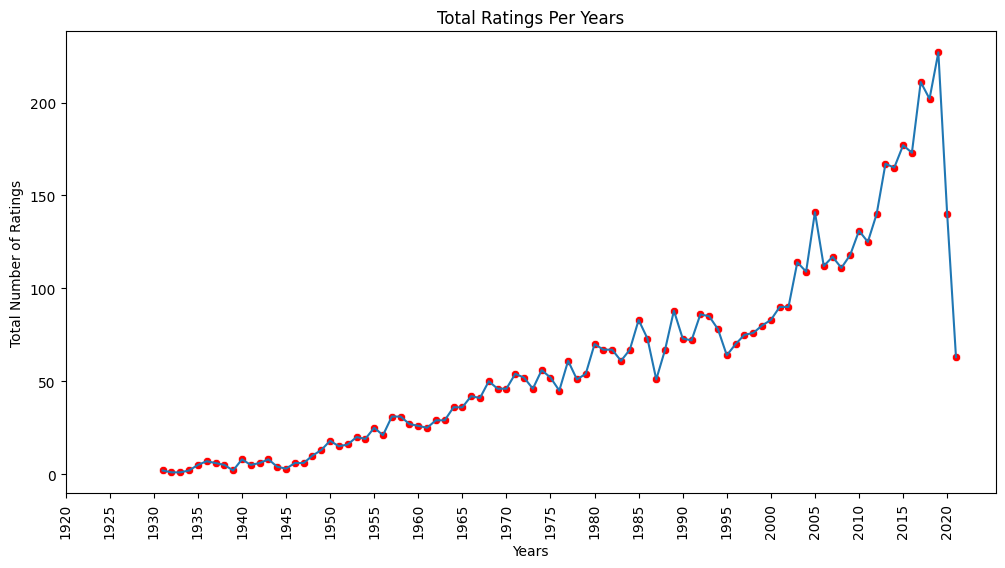

In [89]:
rating_sum = df.groupby('Year')['Rating'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data = rating_sum)
sns.scatterplot(x='Year',y='Rating',data = rating_sum,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Total Number of Ratings')
plt.xlabel('Years')
plt.title('Total Ratings Per Years')
plt.xticks(rotation=90)
plt.show()


### 2. Year with best average rating

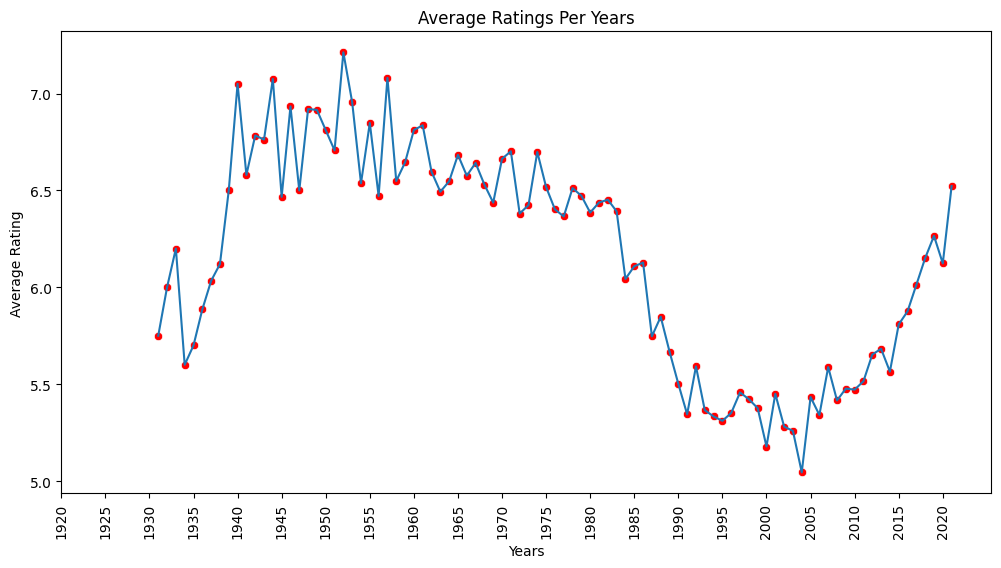

In [90]:
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data = rating_avg)
sns.scatterplot(x='Year',y='Rating',data = rating_avg,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Rating')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.show()


### Barplot of Top 25 Directors by Frequency of Movies

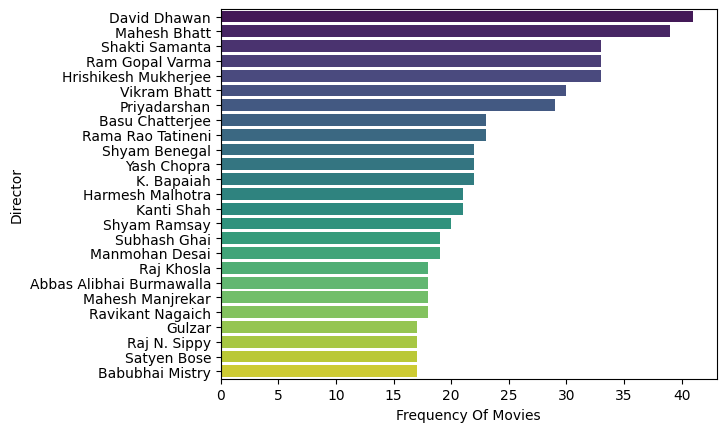

In [91]:
top_25_directors = df.groupby('Director')['ï»¿Name'].count().sort_values(ascending=False).head(25)

sns.barplot(y=top_25_directors.index, x=top_25_directors.values, data = df, orient ='horizontal', palette='viridis')
plt.xlabel('Frequency Of Movies')
plt.ylabel('Director')
plt.show()


'observation':

- Director 'David Dhawan' amongst  to do the highest frequent of movies.
- Director 'Gulzar' , 'Raj N.Sippy' , 'Satyen Bose' and 'Babubhai Mistry' have least in top 25.


### Question- Does length of movie have any impact with the rating?

### Correlation analysis is a method for measuring the covariance of two random variables in a matched data set. Covariance is usually expressed as the correlation coefficient of two variables X and Y. The correlation coefficient is a unitless number that varies from -1 to +1.

Correlation Of Duration And Rating is 0.0018393493773531913


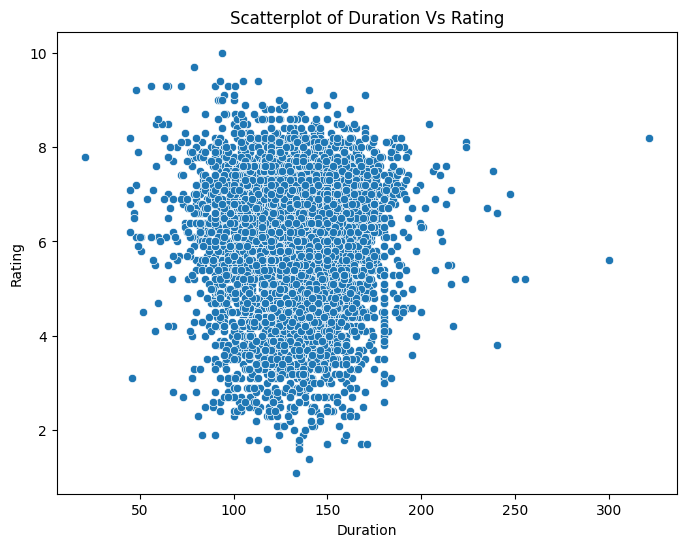

In [92]:
corr_leng_rat = df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")


plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Scatterplot of Duration Vs Rating')
plt.show()

'Observation' :

- The strength of the relationship between the two variables is weak. This means that changes in one variable are not strongly associated with changes in the other variable.

- Positive Relationship: The positive sign indicates that as one variable increases, the other variable tends to increase as well, but the relationship is not strong.

- Limited Predictive Power: Since the correlation coefficient is low, it suggests that using one variable to predict the other may not be very accurate. In other words, knowing the value of one variable provides limited information about the value of the other variable.

- Overall, while a correlation coefficient of 0.0018 .

'Conclusion' :
    
- The correlation coefficient of 0.0018 suggests that there is no meaningful relationship between movie duration and rating, and it is unlikely that duration alone significantly affects how movies are rated.


### Display Top 10 movies according to rating

In [93]:
overall = df.nlargest(10,'Rating')
overall = overall.reset_index(drop=True)
print("Top 10 Movies according to rating :")
overall


Top 10 Movies according to rating :


,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


### Barplot of Top 10 Highest Rated movies 

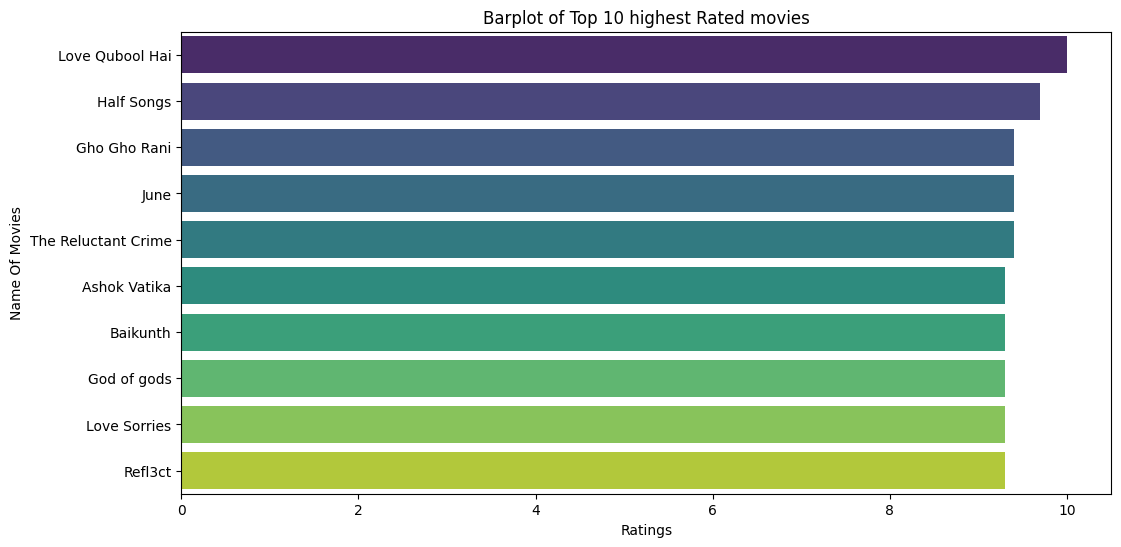

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(y='ï»¿Name', x='Rating',orient='horizontal', data=overall ,palette='viridis')
plt.title("Barplot of Top 10 highest Rated movies")
plt.ylabel('Name Of Movies')
plt.xlabel('Ratings')
plt.show()


'observation' :

- Movie 'Love Qubool Hai' has the highest rating.
- Movie 'Half Songs' has 2nd highest rating.
- Least rated are Movie 'Ashok vatika' , 'Baikunth' , 'God of gods' , 'Love Sorries' and "Refl3ct'.


### Display Yearwise Top 10 Movies 

In [95]:
for year in df['Year'].unique():
    year_df = df[df['Year'] == year]
    top_10_year = year_df.nlargest(10, 'Rating').sort_values(by='Rating', ascending=False)
    print(f"\nTop 10 movies of the year {year}:")
    print(top_10_year)
    print('\n')
    


Top 10 movies of the year 2019:
                                                 ï»¿Name  Year  Duration  \
5077                                        Gho Gho Rani  2019       105   
5125                                         God of gods  2019        90   
13231                                         Sindhustan  2019        64   
10210                              Nirmal Anand Ki Puppy  2019       100   
6811                               Josef - Born in Grace  2019       100   
3802                                             Dhuusar  2019       106   
1709                                    Bahattar Hoorain  2019       120   
8157   Last Chance: The Moment I Finally Embraced the...  2019        74   
14198                                  The Pickup Artist  2019       111   
8238                                         Little Baby  2019       105   

                              Genre  Rating  Votes  \
5077               History, Romance     9.4     47   
5125                  

## Display 

In [96]:
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")


INFO: 

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Name   5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB
None 





summary of the dataframe: 
 <bound method NDFrame.describe of                                   ï»¿Name  Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019       109   
3                                 #Yaaram  2019       110   
5                    ...Aur Pyaar Ho Gaya  1997       147   
6                               ...Yahaa

### Display Pie chart of Most Popular Genres of movies

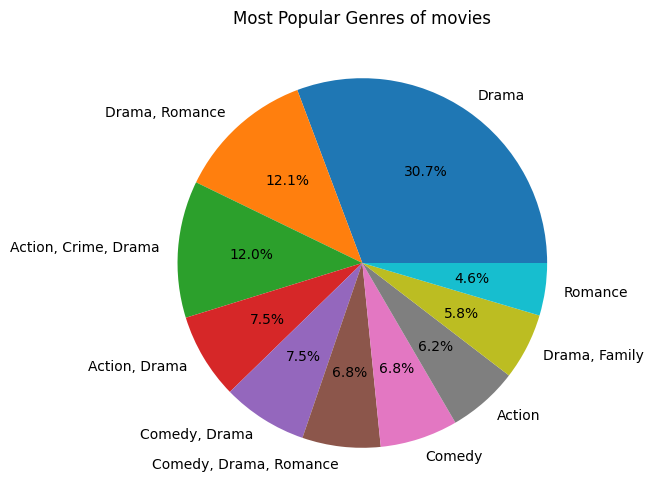

In [97]:
plt.figure(figsize=(12,6))
df['Genre'].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',autopct="%1.1f%%")
plt.title("Most Popular Genres of movies")
plt.ylabel("")
plt.show()


'observation':

- Most Genre of movies is Drama with highest percentage of 30.7%
- Least genre of movies is Romance with 4.6%


### Distribution of movie rating

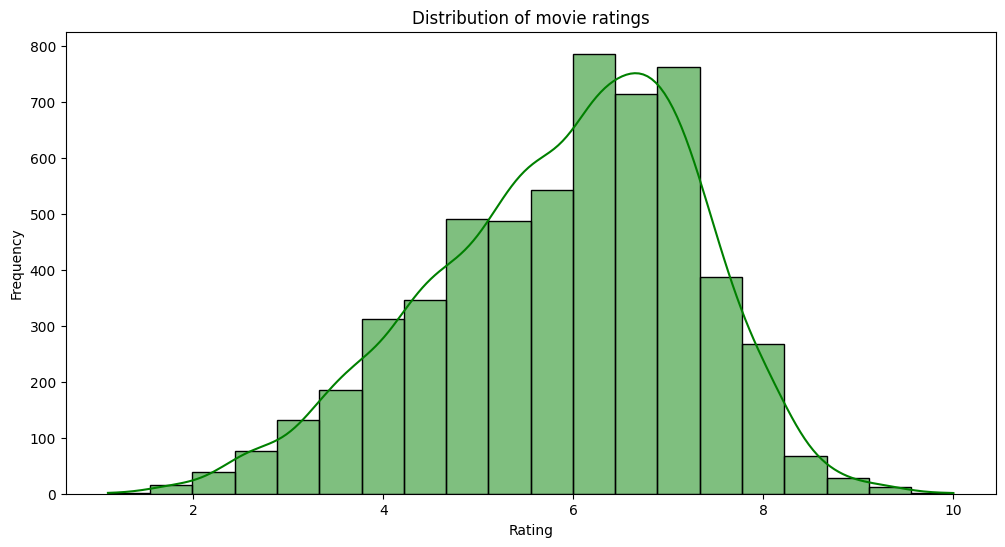

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'],bins=20, color = 'g' ,kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of movie ratings")
plt.show()


### Actor with most number of movies

In [99]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts().reset_index()
# Rename the columns to 'Name' and 'no_of_movies'
actors = actors.rename(columns={'index': 'Name', 'count': 'no_of_movies'})

### Barplot of Top 10 Highest Rated Movies

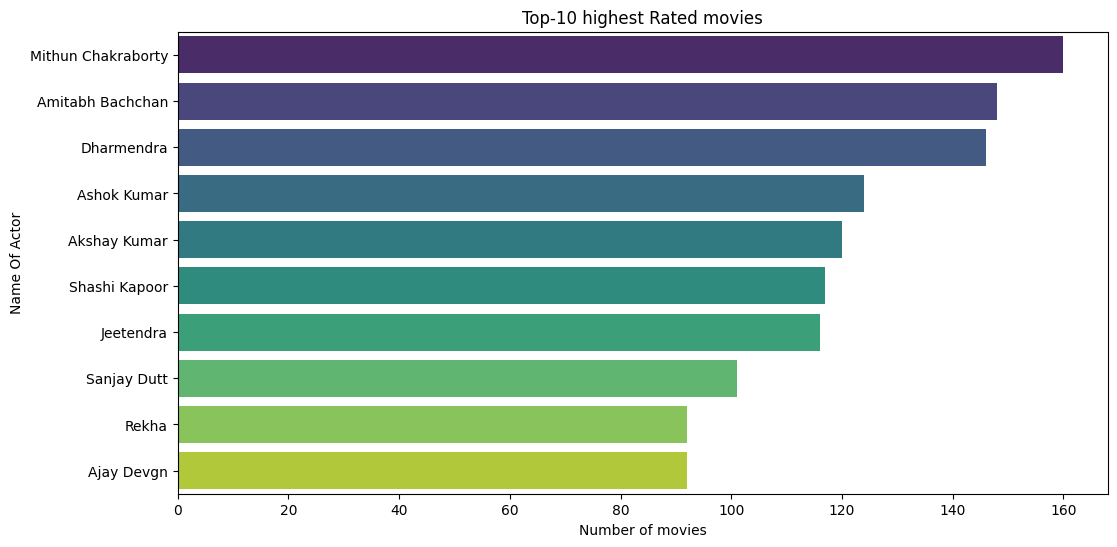

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(y=actors['Name'][:10],x=actors['no_of_movies'][:10],orient='horizontal',palette='viridis')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Name Of Actor')
plt.xlabel('Number of movies')
plt.show()


'observation' :

- Actor 'Mithun Chakraborty' has done movies with highest rate.
- Actor 'Amitabh Bachchan' has done movies with 2nd highest rate.
- Actor 'Rekha' and 'Ajay Devgn' have done movies with least rate.


### Checking for outliers through box plot

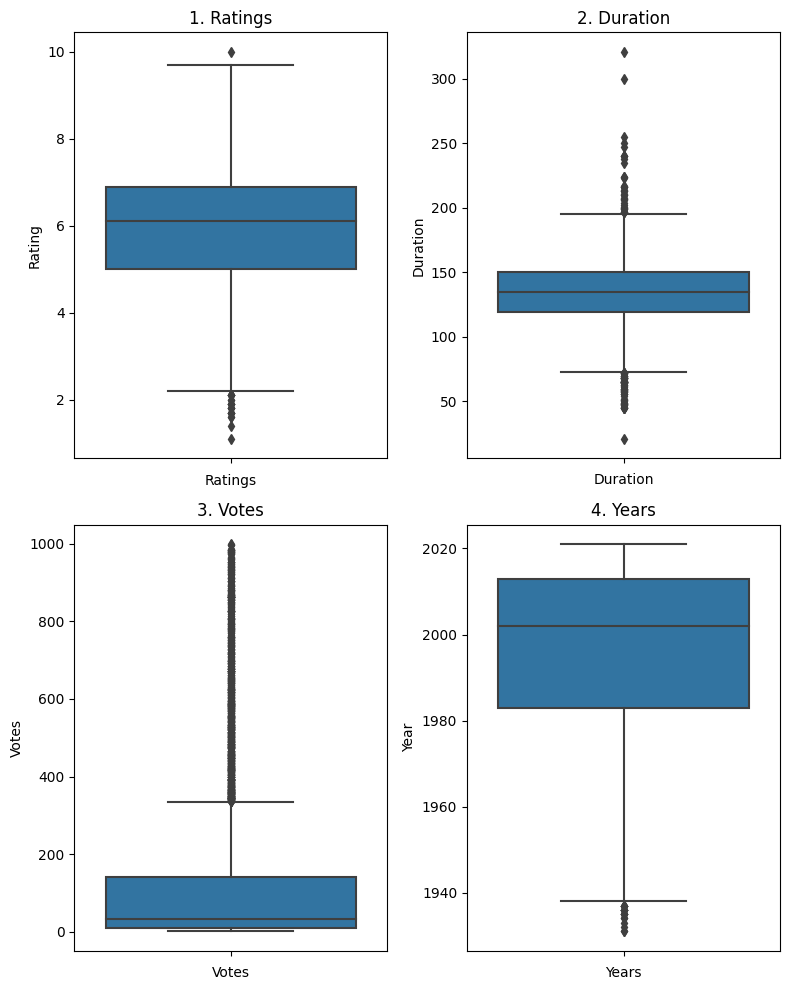

In [101]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('1. Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('2. Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('3. Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('4. Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()


### Analysis of Outlier 

Display Boxplot


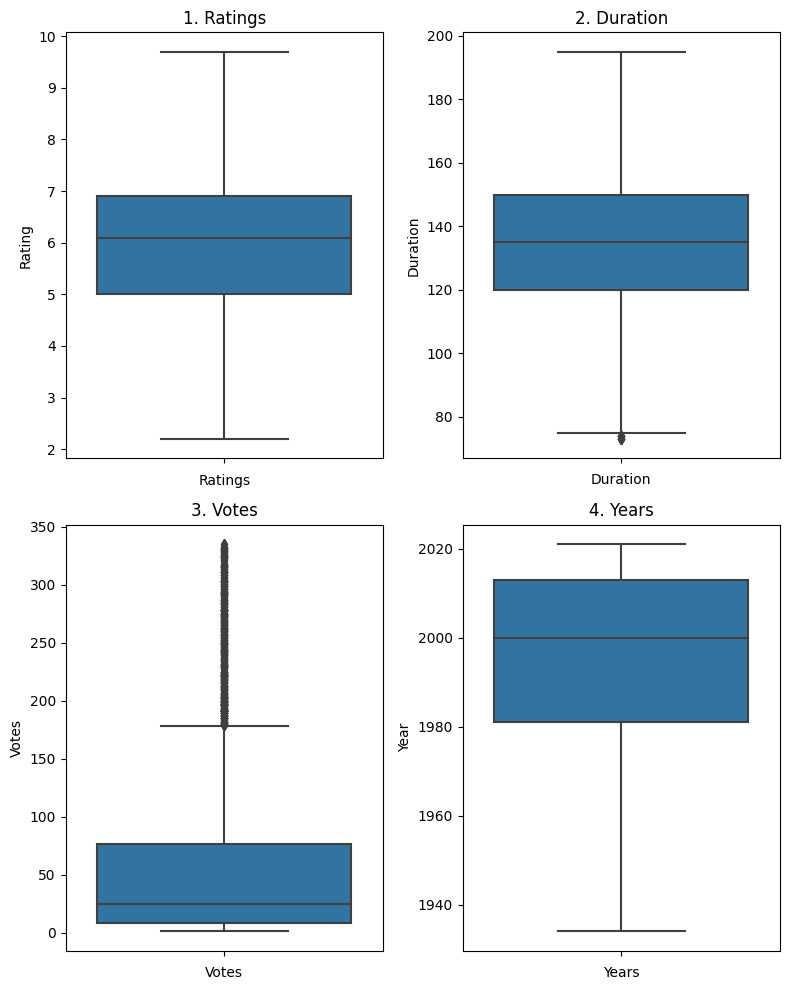

In [102]:
def outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
df=outlier(df,'Rating')
df=outlier(df,'Duration')
df=outlier(df,'Votes')
df=outlier(df,'Year')

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))
print("Display Boxplot")

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('1. Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('2. Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('3. Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('4. Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

## Display Correlation 

### Correlation analysis is a method for measuring the covariance of two random variables in a matched data set. Covariance is usually expressed as the correlation coefficient of two variables X and Y. The correlation coefficient is a unitless number that varies from -1 to +1.

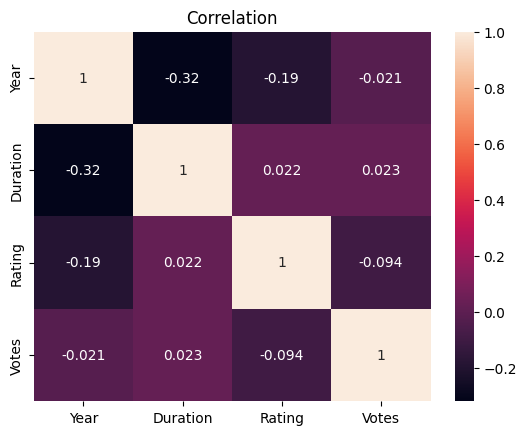

In [103]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.title("Correlation")
plt.show()


'Observation' :

- The strength of the relationship between the two variables is weak. This means that changes in one variable are not strongly associated with changes in the other variable.

- Positive Relationship: The positive sign indicates that as one variable increases, the other variable tends to increase as well, but the relationship is not strong.

- Limited Predictive Power: Since the correlation coefficient is low, it suggests that using one variable to predict the other may not be very accurate. In other words, knowing the value of one variable provides limited information about the value of the other variable.


'Conclusion':

There is correlation between :
- Year and Duration : Negative correlation with -0.32
- Duration and Rating : Positive correlation with 0.022
- Rating and Votes : Negative correlation with -0.094


## Import libraries for feature engineering

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

### Dropping the name column as it does not impact the outcome

In [105]:
df

,ï»¿Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
15490,Zor: Never Underestimate the Force,1998,157,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15492,Zorro,1975,150,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth


In [106]:
df.drop('ï»¿Name',axis=1,inplace=True)
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...
15490,1998,157,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15492,1975,150,"Action, Adventure, Comedy",5.6,33,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15494,2001,153,"Biography, Drama, History",6.2,1,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth


### Grouping the columns with their average rating and then creating a new feature

In [107]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating


### Display all columns

In [108]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

### Keeping predictor and target variables

In [109]:
X = df[['Year', 'Duration', 'Votes', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model building

### Linear regression

### Building model and training

In [112]:

model = LinearRegression()
model


LinearRegression()

In [113]:
model.fit(X_train,y_train)
model_pred = model.predict(X_test)

### Evaluating the performance of the model

In [114]:

print("The performance of evaluation of Linear regression is below :\n")
print("Mean squared error :",mean_squared_error(y_test,model_pred))
print("Mean absolute error :",mean_absolute_error(y_test,model_pred))
print("r2 score :",r2_score(y_test,model_pred))


The performance of evaluation of Linear regression is below :

Mean squared error : 0.352911235932528
Mean absolute error : 0.4430501484661022
r2 score : 0.7964353381603185


# Conclusion :

- The correlation coefficient of 0.0018 suggests that there is no meaningful relationship between movie duration and rating, and it is unlikely that duration alone significantly affects how movies are rated.

There is correlation between :
- Year and Duration : Negative correlation with -0.32
- Duration and Rating : Positive correlation with 0.022
- Rating and Votes : Negative correlation with -0.094

Top 10 Highest rated movies :
- Actor 'Mithun Chakraborty' has done movies with highest rate.
- Actor 'Amitabh Bachchan' has done movies with 2nd highest rate.
- Actor 'Rekha' and 'Ajay Devgn' have done movies with least rate.

Top 25 Directors of frequent of movies :
- Director 'David Dhawan' amongst  to do the highest frequent of movies.
- Director 'Gulzar' , 'Raj N.Sippy' , 'Satyen Bose' and 'Babubhai Mistry' have least in top 25.

  
- In this project, I explored the task of predicting movie ratings using a linear regression model. My analysis revealed valuable insights into the performance and effectiveness of the model in capturing the variability in movie ratings.

- The evaluation of the linear regression model yielded promising results. The model demonstrated a relatively low Mean Squared Error (MSE) of 0.3529 and Mean Absolute Error (MAE) of 0.4431, indicating that, on average, the model's predictions were close to the actual ratings. Additionally, the R-squared (R2) score of 0.7964 indicated that approximately 79.64% of the variance in the movie ratings was explained by the model.

- These findings suggest that the linear regression model shows potential for accurately predicting movie ratings. However, it's important to acknowledge that there may be additional factors and complexities influencing movie ratings that were not captured in our analysis. Further research and refinement of the model, possibly incorporating additional features or employing more advanced modeling techniques, could lead to even more accurate predictions.

